## Análisis Exploratorio de Datos (EDA)

En este cuaderno se hará el análisis exploratorio de los datos. El presente dataset es tomado de la página web: https://www.kaggle.com/datasets/thedevastator/pubmed-article-summarization-dataset?resource=download. El conjunto de datos comprende archivos como validation.csv, train.csv y test.csv, que contienen artículos y resúmenes obtenidos de PubMed, abarcando una amplia variedad de temas científicos.

In [1]:
# Se cargan las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import spacy

C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_17616\2585150763.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Se carga la base de datos
datos = pd.read_csv("train.csv")

In [3]:
# Se visualizan los primeros registros
datos.head()

,article,abstract
0,a recent systematic analysis showed that in 20...,background : the present study was carried out...
1,it occurs in more than 50% of patients and may...,backgroundanemia in patients with cancer who a...
2,"tardive dystonia ( td ) , a rarer side effect ...",tardive dystonia ( td ) is a serious side effe...
3,"lepidoptera include agricultural pests that , ...",many lepidopteran insects are agricultural pes...
4,syncope is caused by transient diffuse cerebra...,we present an unusual case of recurrent cough ...


In [4]:
datos.tail()

,article,abstract
119919,eukaryotic cells depend on vesicle - mediated ...,long - distance trafficking of membranous stru...
119920,fiber post systems are routinely used in resto...,aims and objectives : to study the stress conc...
119921,in most of the peer review publications in the...,abstractbackgroundthe objective of this study ...
119922,\n the reveal registry is a longitudinal regi...,background : patients with pulmonary arterial ...
119923,cerebral palsy is a nonprogressive central ner...,objective . to determine \n if gait waveform c...


In [5]:
# Cantidad de registros del dataset
print(len(datos))

119924


A partir del dataset original "train.csv" se creará otro dataset con 20 registros aleatorios. Esto con el propósito de evitar el costo computacional en tiempo que demanda el trabajo con el dataset original.

In [6]:
df_nuevo = datos.sample(n=20, random_state=11)  

df_nuevo

,article,abstract
53065,direct central nervous system ( cns ) involvem...,a 25-year - old male patient presented to our ...
52325,primary nocturnal enuresis is intermittent noc...,several therapeutic options have been describe...
66534,guillain - barr syndrome ( gbs ) is an immune ...,psychiatric symptoms in guillain - barr syndro...
108525,progress in three - dimensional ( 3d ) echocar...,this review covers the role of three - dimensi...
115291,municipal solid waste workers ( mswws ) or ref...,background : solid waste management has emerge...
61647,stroke is a clinical emergency that commonly r...,to assess the stroke workload of italian neuro...
28296,chronic kidney disease ( ckd ) is one of the m...,glomerular filtration rate ( gfr ) is still a ...
60445,"over the past decade , it has increasingly bec...",study backgroundpatients who experience a recu...
20284,prostate cancer is one of the most prevalent t...,"purposein clinical practice , atypical small a..."
57809,congenital cervical swelling constitutes a het...,an 18-year - old male patient presented with a...


In [9]:
# Se añaden dos columnas de longitud de los artículos y resúmenes
df_nuevo['article_length'] = df_nuevo['article'].apply(lambda x: len(word_tokenize(x)))
df_nuevo['abstract_length'] = df_nuevo['abstract'].apply(lambda x: len(word_tokenize(x)))

In [10]:
df_nuevo

,article,abstract,article_length,abstract_length
53065,direct central nervous system ( cns ) involvem...,a 25-year - old male patient presented to our ...,1394,293
52325,primary nocturnal enuresis is intermittent noc...,several therapeutic options have been describe...,2014,247
66534,guillain - barr syndrome ( gbs ) is an immune ...,psychiatric symptoms in guillain - barr syndro...,4195,108
108525,progress in three - dimensional ( 3d ) echocar...,this review covers the role of three - dimensi...,4951,121
115291,municipal solid waste workers ( mswws ) or ref...,background : solid waste management has emerge...,6167,375
61647,stroke is a clinical emergency that commonly r...,to assess the stroke workload of italian neuro...,7252,220
28296,chronic kidney disease ( ckd ) is one of the m...,glomerular filtration rate ( gfr ) is still a ...,4526,227
60445,"over the past decade , it has increasingly bec...",study backgroundpatients who experience a recu...,1344,268
20284,prostate cancer is one of the most prevalent t...,"purposein clinical practice , atypical small a...",2279,279
57809,congenital cervical swelling constitutes a het...,an 18-year - old male patient presented with a...,841,146


In [16]:
# Se añade una nueva columna que extrae las palabras más comunes por artículo.

from collections import Counter
import string

def get_top_words(article, abstract):
    article_abstract = article + ' ' + abstract
    article_abstract = article_abstract.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(article_abstract)
    word_freq = Counter(tokens)
    top_words = [word for word, freq in word_freq.most_common(10)]
    return top_words

df_nuevo['top_words'] = df_nuevo.apply(lambda row: get_top_words(row['article'], row['abstract']), axis=1)
df_nuevo

,article,abstract,article_length,abstract_length,top_words
53065,direct central nervous system ( cns ) involvem...,a 25-year - old male patient presented to our ...,1394,293,"[of, and, the, in, with, a, s, hodgkin, lympho..."
52325,primary nocturnal enuresis is intermittent noc...,several therapeutic options have been describe...,2014,247,"[the, in, of, and, desmopressin, to, enuresis,..."
66534,guillain - barr syndrome ( gbs ) is an immune ...,psychiatric symptoms in guillain - barr syndro...,4195,108,"[and, of, the, her, to, with, was, anxiety, in..."
108525,progress in three - dimensional ( 3d ) echocar...,this review covers the role of three - dimensi...,4951,121,"[the, and, of, in, with, a, valve, 3dtte, to, mv]"
115291,municipal solid waste workers ( mswws ) or ref...,background : solid waste management has emerge...,6167,375,"[and, the, of, to, waste, in, workers, by, or,..."
61647,stroke is a clinical emergency that commonly r...,to assess the stroke workload of italian neuro...,7252,220,"[the, of, and, stroke, in, nu, for, a, to, er]"
28296,chronic kidney disease ( ckd ) is one of the m...,glomerular filtration rate ( gfr ) is still a ...,4526,227,"[the, of, and, a, to, in, gfr, ml, for, by]"
60445,"over the past decade , it has increasingly bec...",study backgroundpatients who experience a recu...,1344,268,"[the, of, a, patients, to, and, vocal, in, acd..."
20284,prostate cancer is one of the most prevalent t...,"purposein clinical practice , atypical small a...",2279,279,"[the, in, of, cancer, and, prostate, patients,..."
57809,congenital cervical swelling constitutes a het...,an 18-year - old male patient presented with a...,841,146,"[the, of, in, was, a, and, cyst, with, is, tdc]"


In [18]:
# Se usa spaCy para análisis de lenguaje
nlp = spacy.load("en_core_web_sm")

### Cálculo de la similitud entre los artículos y sus resúmenes

El criterio utilizado para calcular la similitud entre los artículos y sus resúmenes es la similitud de coseno entre los vectores de palabras de los textos.

En el código que proporcioné anteriormente, utilizamos spaCy para procesar los textos y calcular la similitud. SpaCy representa cada documento como un vector de palabras (también llamado vector de características) utilizando representaciones de palabras basadas en contextos de alta dimensionalidad (por ejemplo, vectores de palabras GloVe o Word2Vec). Luego, spaCy calcula la similitud de coseno entre estos vectores de palabras para determinar cuán similares son dos documentos entre sí.

La similitud de coseno es una medida comúnmente utilizada para comparar la similitud entre vectores en espacios vectoriales. Se calcula tomando el coseno del ángulo entre dos vectores y produce un valor entre -1 y 1. Un valor de 1 indica una similitud perfecta, mientras que un valor de -1 indica completa disimilitud. Un valor de 0 indica que los vectores son ortogonales entre sí.

In [26]:
# Cálculo de la similitud entre cada artículo y su resumen
similarity_scores = []
for idx, row in df_nuevo.iterrows():
    article_doc = nlp(row['article'])
    abstract_doc = nlp(row['abstract'])
    similarity_score = article_doc.similarity(abstract_doc)
    similarity_scores.append(similarity_score)

# Nueva columna en el DataFrame con los porcentajes de similitud
df_nuevo['similarity_percentage'] = [score * 100 for score in similarity_scores]

# Tabla con los porcentajes de similitud
df_nuevo[['article', 'abstract', 'similarity_percentage']]

C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_18888\3393950678.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity_score = article_doc.similarity(abstract_doc)


,article,abstract,similarity_percentage
53065,direct central nervous system ( cns ) involvem...,a 25-year - old male patient presented to our ...,95.511218
52325,primary nocturnal enuresis is intermittent noc...,several therapeutic options have been describe...,88.280379
66534,guillain - barr syndrome ( gbs ) is an immune ...,psychiatric symptoms in guillain - barr syndro...,87.799449
108525,progress in three - dimensional ( 3d ) echocar...,this review covers the role of three - dimensi...,90.586089
115291,municipal solid waste workers ( mswws ) or ref...,background : solid waste management has emerge...,87.256238
61647,stroke is a clinical emergency that commonly r...,to assess the stroke workload of italian neuro...,74.896378
28296,chronic kidney disease ( ckd ) is one of the m...,glomerular filtration rate ( gfr ) is still a ...,86.624480
60445,"over the past decade , it has increasingly bec...",study backgroundpatients who experience a recu...,93.686421
20284,prostate cancer is one of the most prevalent t...,"purposein clinical practice , atypical small a...",95.441754
57809,congenital cervical swelling constitutes a het...,an 18-year - old male patient presented with a...,92.644246


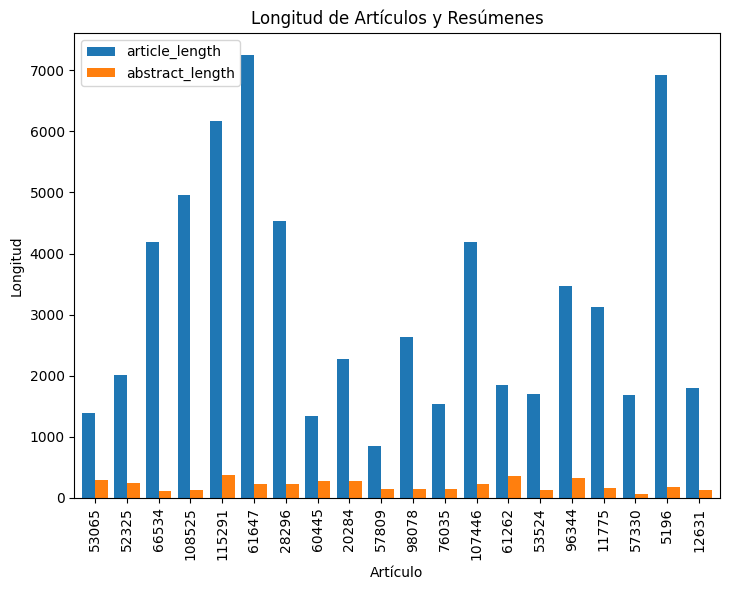

In [28]:
# Gráfico de barras para longitud de artículos y resúmenes

plt.figure(figsize=(14, 6))  
plt.subplot(1, 2, 1)
df_nuevo[['article_length', 'abstract_length']].plot(kind='bar', ax=plt.gca(), width=0.8)  # Ajustar el ancho de las barras
plt.title('Longitud de Artículos y Resúmenes')
plt.ylabel('Longitud')
plt.xlabel('Artículo')
plt.tight_layout()  
plt.show()

In [33]:
# Para posteriores cálculos se extrae el dataframe 'df_nuevo'
df_nuevo.to_csv('df_ref.csv', index=False)